In [1]:
import re, os, sys, math, pickle, subprocess, resource, random
from pathlib import Path
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

In [2]:
from GenomicWindows import window
import GenomicIntervals

In [3]:
%matplotlib inline

# Make inline plots vector graphics instead of raster graphics
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.patches import Rectangle
from mpl_toolkits.basemap import Basemap
#matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

import mpld3

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("paper")

# lowess for plotting
from statsmodels.nonparametric.smoothers_lowess import lowess

/Users/kasper/anaconda/envs/simons/lib/python3.4/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/kasper/anaconda/envs/simons/lib/python3.4/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [7]:
root_dir = Path(os.environ['HOME'], 'GenomeDK', 'hri/faststorage/people/kmt')

In [16]:
#scores = pd.read_table(root_dir / test.scores, sep='\s+', header=None, names=['chrom', 'start', 'score'])
scores_dir = Path('steps/interference_score/chimp/gerp/scores_species_coord')
scores = pd.read_table(root_dir / scores_dir / 'chr10.scores', sep='\s+', header=None, names=['chrom', 'start', 'score'])
scores['end'] = scores['start']

In [17]:
window_size = 100000
@window(size=window_size, fill={'mean_score': np.nan})
def mean_score(df):
    return {'mean_score': np.nanmean(df.score)}

mean_score_df = scores.groupby('chrom').apply(mean_score).reset_index(level=['chrom'])

In [18]:
mean_score_df.tail()

,chrom,start,end,mean_score
1311,chr10,131100000,131200000,337.091182
1312,chr10,131200000,131300000,1632.456512
1313,chr10,131300000,131400000,516.247688
1314,chr10,131400000,131500000,217.232469
1315,chr10,131500000,131600000,490.368217


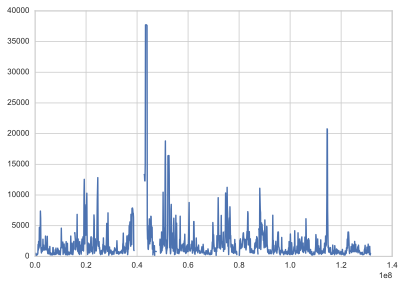

In [19]:
plt.plot(mean_score_df.start, mean_score_df.mean_score)

In [25]:
np.sum(np.isnan(mean_score_df.mean_score))

67

In [26]:
np.sum(np.isnan(scores.score))

0

In [30]:
np.sum(scores.score < 0)

16444

(array([    96.,     97.,    100.,    102.,    100.,    100.,    102.,
            99.,    102.,  15546.]),
 array([ -2.66869696e+05,  -2.40182728e+05,  -2.13495761e+05,
         -1.86808793e+05,  -1.60121825e+05,  -1.33434858e+05,
         -1.06747890e+05,  -8.00609228e+04,  -5.33739552e+04,
         -2.66869877e+04,  -2.01140841e-02]),
 <a list of 10 Patch objects>)

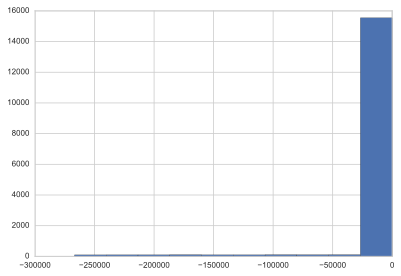

In [37]:
plt.hist(scores.score[scores.score < 0])

# Fix negative scoress...

In [38]:
scores = pd.read_table(root_dir / 'test.scores', sep='\s+', header=None, names=['chrom', 'start', 'score'])
scores['end'] = scores['start']

In [39]:
window_size = 100000
@window(size=window_size, fill={'mean_score': np.nan})
def mean_score(df):
    return {'mean_score': np.nanmean(df.score)}

mean_score_df = scores.groupby('chrom').apply(mean_score).reset_index(level=['chrom'])

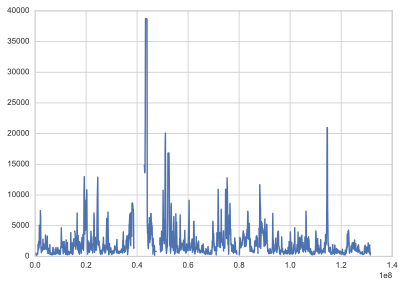

In [40]:
plt.plot(mean_score_df.start, mean_score_df.mean_score)

In [41]:
np.sum(scores.score < 0)

0